In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the dataset
df = pd.read_csv(r"C:\Users\franc\Downloads\Machine Failure Prediction using Sensor data\Machine Failure Prediction using Sensor data.csv")

In [14]:
# Display the first few rows of the dataset
print(df.head())

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [15]:
# Data Preprocessing
# Separate features and target
X = df.drop('fail', axis=1)  # Drop the target column to get features
y = df['fail']  # Use the target column

# Identify numeric columns (all columns are numeric in this dataset)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

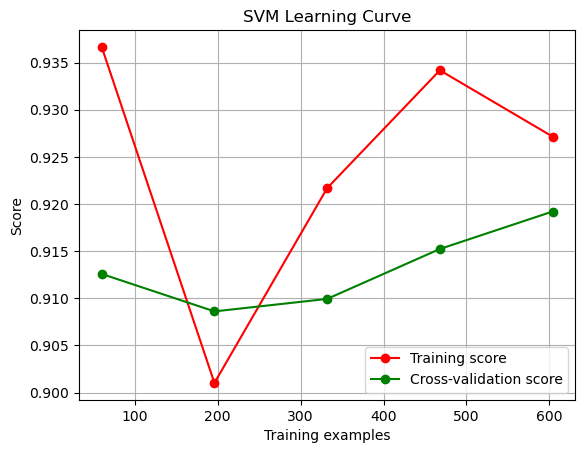

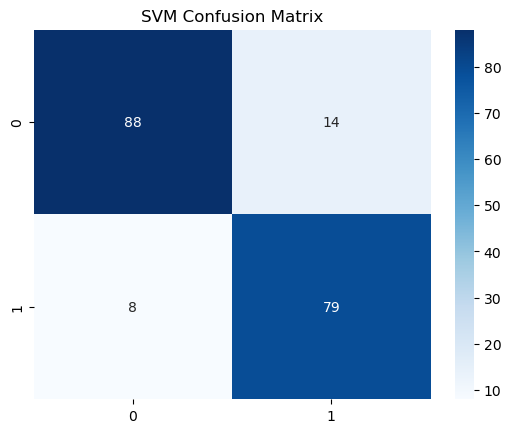

In [17]:

# SVM with GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
grid_svm.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = grid_svm.predict(X_test)
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm)}")
plot_learning_curve(grid_svm.best_estimator_, "SVM Learning Curve", X_train, y_train)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


Epoch 1/50
19/19 [==============================] - 1s 7ms/step - loss: 0.6376 - accuracy: 0.7268 - val_loss: 0.5488 - val_accuracy: 0.8742
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.9007 - val_loss: 0.4203 - val_accuracy: 0.9007
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.9139 - val_loss: 0.3214 - val_accuracy: 0.9007
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9156 - val_loss: 0.2648 - val_accuracy: 0.9007
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9205 - val_loss: 0.2406 - val_accuracy: 0.8940
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9222 - val_loss: 0.2324 - val_accuracy: 0.9007
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9288 - val_loss: 0.2286 - val_accuracy: 0.9007
Epoch 8/50
19/19 [==

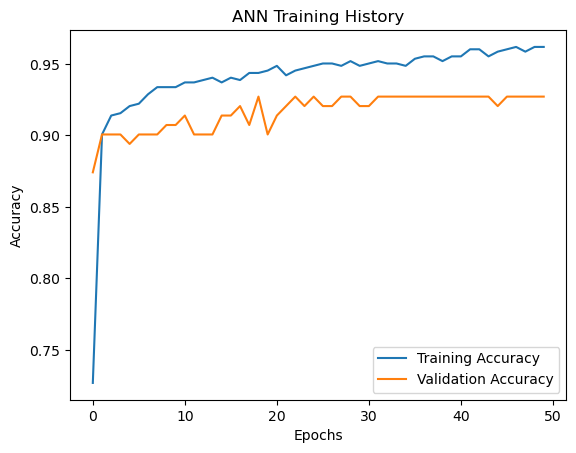

In [18]:
# ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate ANN
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)
print("ANN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(f"Precision: {precision_score(y_test, y_pred_ann)}")
print(f"Recall: {recall_score(y_test, y_pred_ann)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ann)}")

# Plot ANN Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=3, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=3, min_samp

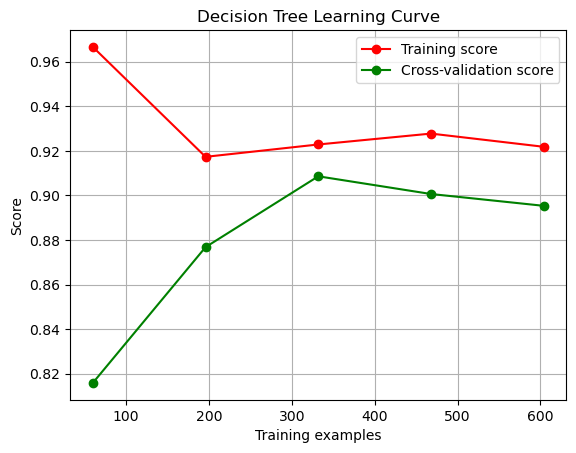

In [19]:
# Decision Tree with GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=2)
grid_dt.fit(X_train, y_train)

# Evaluate DT
y_pred_dt = grid_dt.predict(X_test)
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt)}")
plot_learning_curve(grid_dt.best_estimator_, "Decision Tree Learning Curve", X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

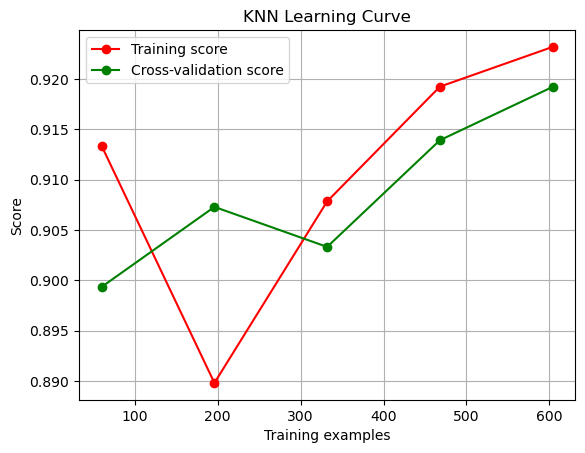

In [20]:
# KNN with GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2)
grid_knn.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = grid_knn.predict(X_test)
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn)}")
plot_learning_curve(grid_knn.best_estimator_, "KNN Learning Curve", X_train, y_train)

Boosting Results:
Accuracy: 0.873015873015873
Precision: 0.8315789473684211
Recall: 0.9080459770114943
F1-Score: 0.8681318681318682


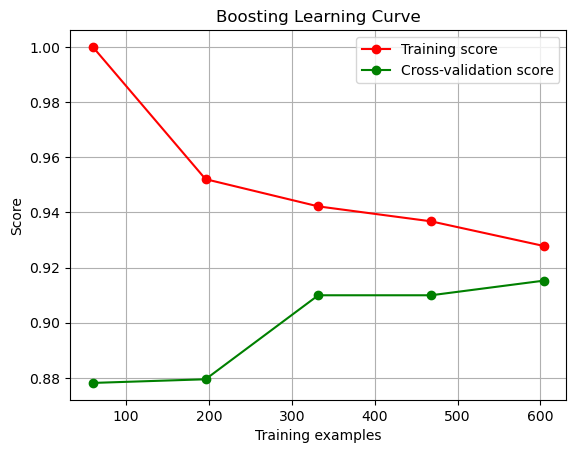

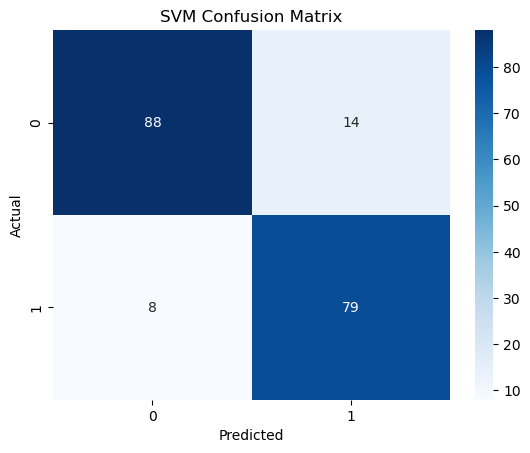

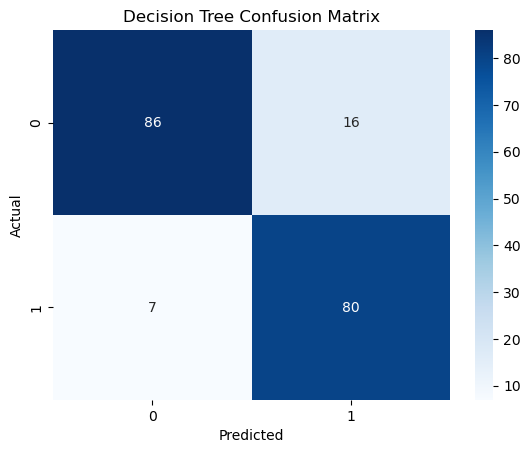

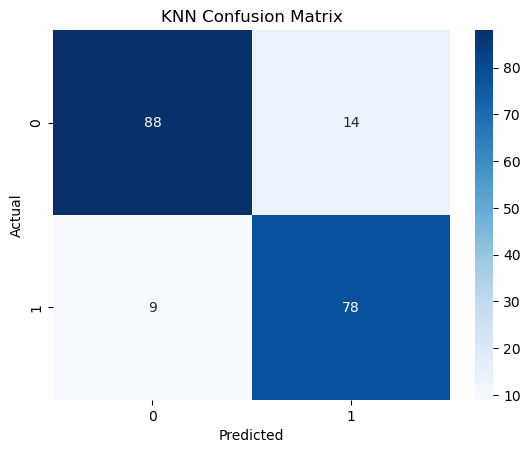

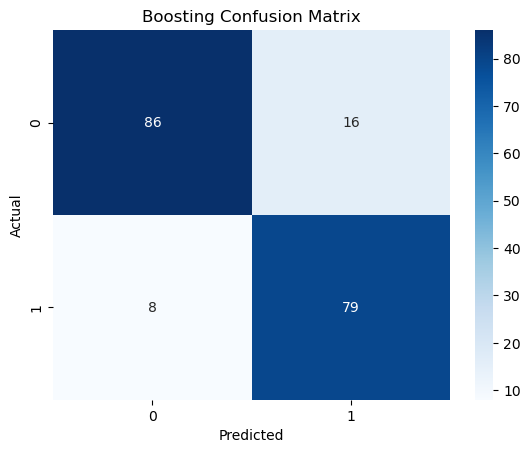

In [21]:
## Evaluate Boosting
y_pred_boost = grid_boost.predict(X_test)
print("Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boost)}")
print(f"Precision: {precision_score(y_test, y_pred_boost)}")
print(f"Recall: {recall_score(y_test, y_pred_boost)}")
print(f"F1-Score: {f1_score(y_test, y_pred_boost)}")
plot_learning_curve(grid_boost.best_estimator_, "Boosting Learning Curve", X_train, y_train)

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_boost, "Boosting Confusion Matrix")

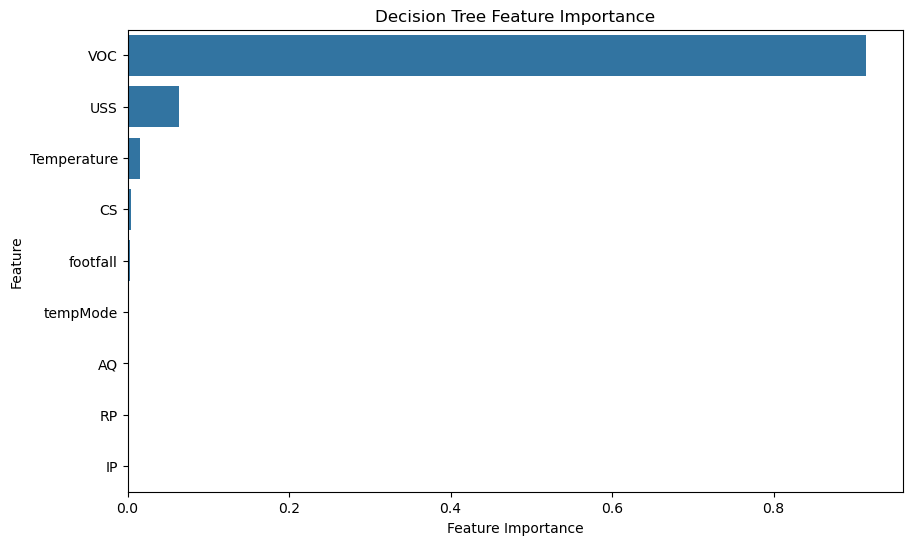

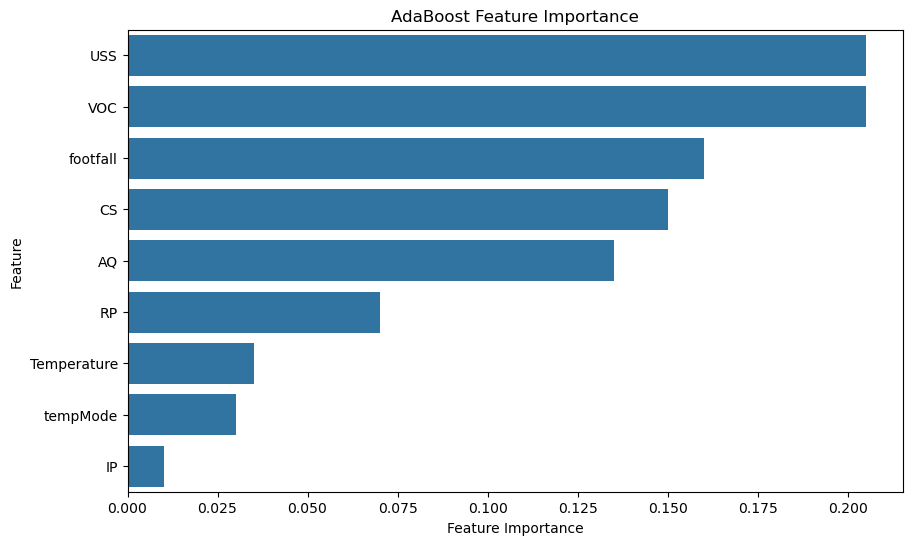

In [22]:
# Feature Importance Plots (for Decision Tree and AdaBoost)
def plot_feature_importance(importance, names, title):
    feature_importance = pd.DataFrame({'feature': names, 'importance': importance})
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names
feature_names = numeric_cols.tolist()  # Only numeric columns, no categorical columns

# Plot feature importance for Decision Tree
plot_feature_importance(grid_dt.best_estimator_.feature_importances_, feature_names, "Decision Tree Feature Importance")

# Plot feature importance for AdaBoost
plot_feature_importance(grid_boost.best_estimator_.feature_importances_, feature_names, "AdaBoost Feature Importance")


       Algorithm  Accuracy  Precision    Recall  F1-Score
0            SVM  0.883598   0.849462  0.908046  0.877778
1  Decision Tree  0.878307   0.833333  0.919540  0.874317
2            KNN  0.878307   0.847826  0.896552  0.871508
3       Boosting  0.873016   0.831579  0.908046  0.868132
4            ANN  0.867725   0.869048  0.839080  0.853801


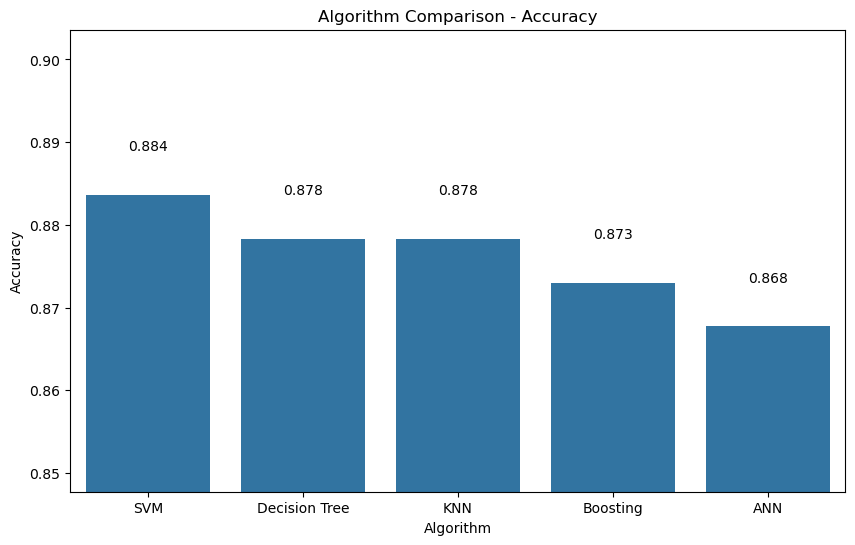

In [25]:
# Comparison of Algorithms (including ANN)
results = {
    'Algorithm': ['SVM', 'Decision Tree', 'KNN', 'Boosting', 'ANN'],
    'Accuracy': [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_boost), accuracy_score(y_test, y_pred_ann)],
    'Precision': [precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_boost), precision_score(y_test, y_pred_ann)],
    'Recall': [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_boost), recall_score(y_test, y_pred_ann)],
    'F1-Score': [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_boost), f1_score(y_test, y_pred_ann)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Bar plot for algorithm comparison (including ANN)
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=results_df)
plt.title("Algorithm Comparison - Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

# Adjust y-axis scale to focus on a narrower range
min_accuracy = results_df['Accuracy'].min() - 0.02  # Subtract a small buffer
max_accuracy = results_df['Accuracy'].max() + 0.02  # Add a small buffer
plt.ylim(min_accuracy, max_accuracy)  # Set y-axis limits

# Add data labels
for index, value in enumerate(results_df['Accuracy']):
    plt.text(index, value + 0.005, f'{value:.3f}', ha='center', va='bottom')

plt.show()